#Project 2 - Investing in Stocks: (Fall 2021)

‘Can a Member of Congress give you stock tips?’



# Senator Assigned - Thomas R Carper

The data for the transactions is extracted via below link in csv format:

https://senatestockwatcher.com/api

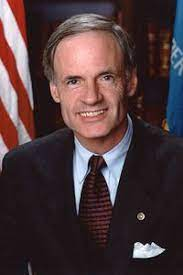

Thomas Richard Carper (born January 23, 1947) is an American politician and former military officer serving as the senior United States Senator from Delaware, having held the seat since 2001. A member of the Democratic Party, Carper served in the United States House of Representatives from 1983 to 1993 and was the 71st governor of Delaware from 1993 to 2001.

For this project, we are importing the transactional data for all the senators investing in stock market from Senate Stock Watcher.

As we are assigned for doing analysis and modelling for the stock transactions of Thomas R Carper, we will move forward with his transactions.

## Importing Data
In This block we import the data, into CSV

### Importing the transactional Data

> We import the various packages into pandas



In [ ]:
#Import the transaction data as csv

import pandas as pd
import numpy as np


### Importing the json from dataset into csv
 Printing the number of rows and columns and also the first five observations in this dataset 

In [ ]:
### You had the correct framework to do this properly, but you ended by accessing your personal drive rather than the file_path you had created.
### Not sure why you did this, but I have fixed it below because we cannot run it as we do not have access to your drive.
### Additionally, this is what we wanted to see as a process for the main dataframe.


### THIS BELOW WAS ALL THE STUDENTS PROFESSOR:
# Step 1: copy & paste the shared link you will get from Google Drive
URL = 'https://drive.google.com/file/d/1aPsZQD5hIaQ1MGdxnpnY2YqkZHFjnGDm/view?usp=sharing'

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the CSV data and build a dataframe
#add1 is the new dataframe containing external data sourced to be enhanced with existing dataframe g
# add1 = pd.read_csv('/content/drive/Shareddrives/OPIM 5604 Business Decision Modelling/OPIM_5641_Group 3/Project 1/Releases_from_Federally_Regulated_Underground_Storage_Tank_Systems.csv')

### I Commented above line out so that could run this instead to fix the access - Hunter:
add1 = pd.read_csv(fixed_path + file_path)
print(add1.shape)
add1.head()

(8879, 11)


,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
0,09/30/2021,Joint,PG,Procter &amp; Gamble Company (The) Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
1,09/30/2021,Joint,NFLX,"Netflix, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
2,09/30/2021,Joint,MPWR,"Monolithic Power Systems, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
3,09/30/2021,Joint,KEYS,Keysight Technologies Inc. Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
4,09/30/2021,Joint,KLAC,KLA Corporation - Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021


## EDA





> We are going to do some cleaning as well as analyse our senators portfolio, to choose 10 stocks for our portfolio allocation






### Selecting our Senator from the entire list

Displaying all senator names in the dataset

In [ ]:
#The below code helps in displaying the names of all the unique senators in the data
add1['senator'].unique()

array(['Thomas H Tuberville', 'Cynthia M Lummis', 'Thomas R Carper',
       'Roy Blunt', 'Shelley M Capito', 'A. Mitchell Mcconnell, Jr.',
       'Sheldon Whitehouse', 'Patrick J Toomey', 'Mark R Warner',
       'Christopher A Coons', 'Roger W Marshall', 'John Hoeven',
       'Rand Paul', 'John W Hickenlooper', 'Gary C Peters',
       'Angus S King, Jr.', 'Susan M Collins', 'Michael F Bennet',
       'Ron L Wyden', 'William F Hagerty, Iv', 'Rick Scott',
       'John Boozman', 'Mike Rounds', 'Jerry Moran,', 'Richard M Burr',
       'Tina Smith', 'Ladda Tammy Duckworth', 'Daniel S Sullivan',
       'James M Inhofe', 'Pat Roberts', 'Jacklyn S Rosen',
       'William Cassidy', 'Richard Blumenthal', 'David A Perdue , Jr',
       'Kelly Loeffler', 'Timothy M Kaine', 'Jeanne Shaheen',
       'Ron Johnson', 'Roger F Wicker', 'Dianne Feinstein',
       'Lamar Alexander', 'John N Kennedy', 'Rafael E Cruz',
       'Thomas Udall', 'John F Reed', 'Thomas R Tillis',
       'John A Barrasso', 'Robert

Filtering out the Data of Thomas R Carper senator

In [ ]:
# filtering the dataset by our required senator Thomas R Carper
add2 = add1[add1['senator']=='Thomas R Carper']

In [ ]:
#The below Dataframe is filtered dataset by senator - Thomas R Carper
add2

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
36,09/28/2021,Spouse,GOOG,Alphabet Inc. - Class C Capital Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
37,09/28/2021,Spouse,AAPL,Apple Inc. - Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
38,09/23/2021,Spouse,--,"JP Morgan Chase and Co <div class=""text-muted""...",Corporate Bond,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
39,09/23/2021,Spouse,--,"JP Morgan Chase and Co <div class=""text-muted""...",Corporate Bond,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
40,09/17/2021,Spouse,--,"JPM Contingent Autocall GILD <div class=""text-...",Corporate Bond,Purchase,"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
...,...,...,...,...,...,...,...,...,...,...,...
8844,11/05/2012,NaN,NaN,This filing was disclosed via scanned PDF. Use...,PDF Disclosed Filing,NaN,Unknown,NaN,Thomas R Carper,https://efdsearch.senate.gov/search/view/paper...,11/05/2012
8853,10/10/2012,NaN,NaN,This filing was disclosed via scanned PDF. Use...,PDF Disclosed Filing,NaN,Unknown,NaN,Thomas R Carper,https://efdsearch.senate.gov/search/view/paper...,10/10/2012
8857,10/04/2012,NaN,NaN,This filing was disclosed via scanned PDF. Use...,PDF Disclosed Filing,NaN,Unknown,NaN,Thomas R Carper,https://efdsearch.senate.gov/search/view/paper...,10/04/2012
8866,09/11/2012,NaN,NaN,This filing was disclosed via scanned PDF. Use...,PDF Disclosed Filing,NaN,Unknown,NaN,Thomas R Carper,https://efdsearch.senate.gov/search/view/paper...,09/11/2012


### Filtering out stock data from dataset

We are not using various securities in the non-linear optimization, so we decided to filter them out


Filtering out the data of Stocks

In [ ]:
# Further filterting the data by asset_type as stocks as this what is required for EDA
add2 = add2[add2['asset_type']=='Stock']
add2

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
36,09/28/2021,Spouse,GOOG,Alphabet Inc. - Class C Capital Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
37,09/28/2021,Spouse,AAPL,Apple Inc. - Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021
71,08/23/2021,Spouse,LMRK,Landmark Infrastructure Partners LP - Common U...,Stock,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021
74,08/11/2021,Spouse,WW,"WW International, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021
75,08/04/2021,Spouse,ARE,"Alexandria Real Estate Equities, Inc. Common S...",Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021
...,...,...,...,...,...,...,...,...,...,...,...
7916,01/28/2015,Spouse,TGT,Target Corp. (NYSE),Stock,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,02/03/2015
7917,01/26/2015,Spouse,HBI,Hanesbrands Inc. (NYSE),Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,02/03/2015
7918,01/22/2015,Spouse,--,Nike Inc B,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,02/03/2015
7919,01/22/2015,Spouse,PNQI,PowerShares NASDAQ Internet ETF (NASDAQ),Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,02/03/2015


### Summary of our Data

Describing the summary statistics of the data

In [ ]:
# The below represents the summary statistics of the data
add2.describe()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
count,460,460,460,460,460,460,460,460,460,460,460
unique,133,2,137,336,1,4,3,4,1,64,64
top,08/31/2017,Spouse,--,E. I. du Pont de Nemours and Company (NYSE),Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/06/2017
freq,53,458,226,12,460,273,443,456,460,53,53


### Treating Missing Values

Finding Null Values

In [ ]:
#checking the dataset for null  values
add2.isnull().sum()

transaction_date     0
owner                0
ticker               0
asset_description    0
asset_type           0
type                 0
amount               0
comment              0
senator              0
ptr_link             0
disclosure_date      0
dtype: int64

In [ ]:
n=add2

### Converting Datetime Object

We convert string into Datetime Object to help in parsing for required date 

In [ ]:
# from --> %m/%d/%Y to --> #YYYY-DD-MM for ease of processing 

n['date'] = pd.to_datetime(n['transaction_date'], format='%m/%d/%Y')
print(n['date'])

36     2021-09-28
37     2021-09-28
71     2021-08-23
74     2021-08-11
75     2021-08-04
          ...    
7916   2015-01-28
7917   2015-01-26
7918   2015-01-22
7919   2015-01-22
7920   2015-01-22
Name: date, Length: 460, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#YYYY-DD-MM
n['date']

36     2021-09-28
37     2021-09-28
71     2021-08-23
74     2021-08-11
75     2021-08-04
          ...    
7916   2015-01-28
7917   2015-01-26
7918   2015-01-22
7919   2015-01-22
7920   2015-01-22
Name: date, Length: 460, dtype: datetime64[ns]

In [ ]:
#The dataframe has the date in both the formats which is the "disclosure_date	" and "date"
n.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date,date
36,09/28/2021,Spouse,GOOG,Alphabet Inc. - Class C Capital Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021,2021-09-28
37,09/28/2021,Spouse,AAPL,Apple Inc. - Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,10/04/2021,2021-09-28
71,08/23/2021,Spouse,LMRK,Landmark Infrastructure Partners LP - Common U...,Stock,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021,2021-08-23
74,08/11/2021,Spouse,WW,"WW International, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021,2021-08-11
75,08/04/2021,Spouse,ARE,"Alexandria Real Estate Equities, Inc. Common S...",Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,09/01/2021,2021-08-04


In [ ]:
# deleted the column disclosure date
del n['disclosure_date']

In [ ]:
n # to print the to n rows of the data

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,date
36,09/28/2021,Spouse,GOOG,Alphabet Inc. - Class C Capital Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,2021-09-28
37,09/28/2021,Spouse,AAPL,Apple Inc. - Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,2021-09-28
71,08/23/2021,Spouse,LMRK,Landmark Infrastructure Partners LP - Common U...,Stock,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,2021-08-23
74,08/11/2021,Spouse,WW,"WW International, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,2021-08-11
75,08/04/2021,Spouse,ARE,"Alexandria Real Estate Equities, Inc. Common S...",Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/d...,2021-08-04
...,...,...,...,...,...,...,...,...,...,...,...
7916,01/28/2015,Spouse,TGT,Target Corp. (NYSE),Stock,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,2015-01-28
7917,01/26/2015,Spouse,HBI,Hanesbrands Inc. (NYSE),Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,2015-01-26
7918,01/22/2015,Spouse,--,Nike Inc B,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,2015-01-22
7919,01/22/2015,Spouse,PNQI,PowerShares NASDAQ Internet ETF (NASDAQ),Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,2015-01-22


### Filtering for given Dates

We filter out our dataset based on the given dates

In [ ]:
 #Filtered the date according to the duration mentioned between '2015-09-01' and '2020-09-15'
 filtered_n = n.loc[(n['date'] >= '2015-09-01')
                     & (n['date'] < '2020-09-15')]

In [ ]:
#the dataframe is flitered with the specfic duration
filtered_n

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,date
737,08/21/2020,Spouse,LDP,Cohen &amp; Steers Limited Duration Preferred ...,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/f...,2020-08-21
739,08/21/2020,Spouse,TCEHY,Tencent Holdings Limited,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/f...,2020-08-21
740,08/21/2020,Spouse,ARE,"Alexandria Real Estate Equities, Inc.",Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/f...,2020-08-21
741,08/21/2020,Spouse,CONE,CyrusOne Inc.,Stock,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/f...,2020-08-21
744,08/06/2020,Spouse,LDP,Cohen &amp; Steers Limited Duration Preferred ...,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/f...,2020-08-06
...,...,...,...,...,...,...,...,...,...,...,...
7171,09/17/2015,Spouse,--,Bank of America,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/b...,2015-09-17
7172,09/17/2015,Spouse,--,Walt Disney &amp; Co Hldg Co,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/b...,2015-09-17
7173,09/17/2015,Spouse,--,JP Morgan Chase &amp; Co.,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/b...,2015-09-17
7174,09/17/2015,Spouse,--,Verizon Communications,Stock,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/b...,2015-09-17


### Checking Unique Values

We check amount and type column for unique value, we do so so we can bin together the amount into specific cost based on the project details given


In [ ]:

filtered_n['amount'].unique()

array(['$1,001 - $15,000', '$15,001 - $50,000', '$50,001 - $100,000'],
      dtype=object)

In [ ]:
  filtered_n['type'].unique()       # unique n type data filtered

array(['Purchase', 'Sale (Partial)', 'Exchange', 'Sale (Full)'],
      dtype=object)

In [ ]:
filtered_n = filtered_n.reset_index()       # reset index

### Filter out Missing Tickers

We filter out stocks that have missing ticker values, as mentioned in the project document

In [ ]:
filtered_n['ticker']=filtered_n['ticker'][~filtered_n['ticker'].str.contains("--")]  #filtered

In [ ]:
df =  filtered_n      # filtered the n rows

### Binning amount from range to Specific value

We convert the string column of amount from a range of values to a specific value that is based on the upper bound of the range of values into a new column named 'cost'

In [ ]:
df["cost"] = np.nan  # using it to to replace missing values as not a number in our dataset

In [ ]:
## Binned the Interval to the upper limit of the amount
for i in range(0,len(df)):           # used the if loop for the given set of conditions
  if(df['amount'][i] == '$1,001 - $15,000'):
    df['cost'][i] = 15000
  if(df['amount'][i] == '$15,001 - $50,000'):
    df['cost'][i] = 50000
  if(df['amount'][i] == '$50,001 - $100,000'):
    df['cost'][i] = 100000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['ticker'].unique()        # to find the unique ticker (publicly traded stocks)

array(['LDP', 'TCEHY', 'ARE', 'CONE', 'LGI', 'WW', 'C', 'QCOM', 'RMD',
       'OHI', 'ARCC', 'LMT', 'WIW', 'NVDA', 'AXS', 'MPW', 'GLAD', 'MANT',
       'SWKS', 'HASI', 'ABBV', 'LMRK', 'AY', 'IRM', 'LHX', 'APO', 'AAPL',
       'PFE', 'TSN', 'PYPL', 'CVS', 'CEF', 'DIS', 'FPL', 'DRI', 'SBUX',
       'DGX', 'PKG', 'MET', 'RTN', 'CFG', 'MPC', 'KNX', 'CB', 'HPQ',
       'CAG', 'GLW', 'FITB', 'MSFT', 'NVO', 'PEP', 'VZ', 'VOD', 'WFC',
       'CSCO', 'JPM', 'HQL', 'BSTZ', 'UAA', 'BP', 'MCD', 'MO', 'TSM',
       'ABB', 'SMG', 'VGR', nan, 'NWL', 'PBA', 'DHR', 'HRS', 'HRL', 'NPK',
       'RHI', 'TMO', 'RAI', 'SCCO', 'ASIX', 'MDT', 'AEE', 'WTR', 'SE',
       'ADT.F'], dtype=object)

### Aggregating based on various values

We aggregate the dataset based on date,ticker,type. We did to better visualize our data, this helped us making our analysis.

In [ ]:
df2 = df.groupby(['date','ticker','type']).agg({"index": 'count',"cost":'mean'})     # using by group by function to combine coloumns of date , ticker and type using mathematical functions like count and mean

In [ ]:
df2                  # print dataframe2

index     cost
date       ticker type                          
2016-02-16 ADT.F  Sale (Full)         1  15000.0
2016-03-31 SE     Purchase            1  15000.0
2016-06-07 WTR    Sale (Full)         1  15000.0
2016-06-24 AEE    Sale (Full)         1  15000.0
2016-09-26 MDT    Sale (Full)         1  15000.0
...                                 ...      ...
2020-08-06 LDP    Purchase            1  15000.0
2020-08-21 ARE    Sale (Partial)      1  15000.0
           CONE   Sale (Partial)      1  15000.0
           LDP    Purchase            1  15000.0
           TCEHY  Sale (Partial)      1  15000.0

[121 rows x 2 columns]

In [ ]:
df2 = df2.reset_index()           # reset  dataframe 2 index

In [ ]:
df2.columns                              # to print dataframe 2 columns

Index(['date', 'ticker', 'type', 'index', 'cost'], dtype='object')

### Sort Stock by Number of Stocks Purchased.

We sort our stock based on the frequency of stocks purchased/sold. We further go on to divide the dataset into two parts:

* Purchasing History 

* Sale History

In [ ]:
df2 = df2.sort_values(by='index', ascending=False)          # sorting values by stocks index

In [ ]:
df2             #dataframe 2 defined

,date,ticker,type,index,cost
59,2020-04-02,CEF,Purchase,2,15000.0
27,2019-06-26,BSTZ,Purchase,2,15000.0
39,2019-12-17,UAA,Sale (Full),2,15000.0
40,2020-02-22,BSTZ,Sale (Full),2,15000.0
41,2020-02-22,HQL,Purchase,2,15000.0
...,...,...,...,...,...
35,2019-11-04,RTN,Purchase,1,15000.0
34,2019-11-04,MO,Sale (Full),1,15000.0
33,2019-11-04,MCD,Purchase,1,15000.0
32,2019-11-04,DRI,Purchase,1,15000.0


In [ ]:
df2['type'].unique()        # unique type defined

array(['Purchase', 'Sale (Full)', 'Sale (Partial)', 'Exchange'],
      dtype=object)

In [ ]:
# Data frame with the type as only sales which contains both Sales (full) & Sale(Partial) 
sale = df2[df2['type'].str.contains('Sale')]

In [ ]:
# Data frame with the type as only Purchase
pur = df2[df2['type'].str.contains('Purchase')]

### Display Sale and Purchasing History

We mentioned above that we split the dataset, the code below represents the top 5 from each split Sold and Purchased Stock Respectively.

In [ ]:
sale.head()      # print the first n rows of sale column

,date,ticker,type,index,cost
39,2019-12-17,UAA,Sale (Full),2,15000.0
40,2020-02-22,BSTZ,Sale (Full),2,15000.0
0,2016-02-16,ADT.F,Sale (Full),1,15000.0
84,2020-04-02,TCEHY,Sale (Partial),1,15000.0
80,2020-04-02,RMD,Sale (Partial),1,15000.0


In [ ]:
pur.head()   # print the first n rows of purchased column

,date,ticker,type,index,cost
59,2020-04-02,CEF,Purchase,2,15000.0
27,2019-06-26,BSTZ,Purchase,2,15000.0
41,2020-02-22,HQL,Purchase,2,15000.0
79,2020-04-02,QCOM,Purchase,1,15000.0
88,2020-04-14,DIS,Purchase,1,15000.0


In [ ]:
# Reseting the index for all the dataframes which are created above to perform the next steps 
sale = sale.reset_index()
pur = pur.reset_index()

### Groupby based on Ticker

We grouby sale and purchase dataset based on ticker to get the frequency of the most stock sold or purchased by Senator.

In [ ]:
#grouping the df purchase based on the ticker
pur_ticker=pur.groupby(['ticker']).agg({"index": 'sum',"cost":'mean'}) ## WHAT IS THE AGG FUNCTION DOING HERE 
pur_ticker =pur_ticker.sort_values(by='index', ascending=False)
#print(pur_ticker)
pur_ticker = pur_ticker.reset_index() ## CAN WE DROP THE PREVIOUS INDEX AFTER RESETTING THE INDEX
#print(pur_ticker)

In [ ]:
# Grouping the dataframe sale purchase based on the ticker
sale_ticker=sale.groupby(['ticker']).agg({"index": 'sum', "cost":'mean'})
sale_ticker =sale_ticker.sort_values(by='index', ascending=False)
sale_ticker = sale_ticker.reset_index()

### Visualization of the stocks purchased and sold by the senator

Plotting the graph for Senator most purchased 10 stocks

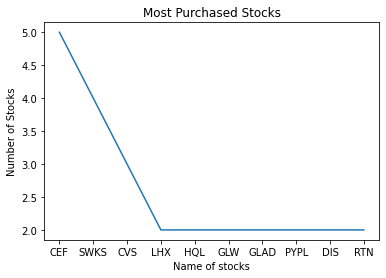

In [ ]:
import matplotlib.pyplot as plt         #imported matplotlib as package from python
import matplotlib
#dates = matplotlib.dates.date2num(pur['date'])
plt.plot(pur_ticker['ticker'][0:10], pur_ticker['index'][0:10],linestyle ='solid') # Top 10 purchase ticker
plt.title('Most Purchased Stocks') # adding title
plt.xlabel('Name of stocks') #Labelling x axis
plt.ylabel('Number of Stocks') ## Labelling Y axis
plt.show()



From the above graph, we can analyze that out of the **most purchased 10 stocks** by the senator, CEF, SWKS and CVS are the most purchased stocks among the ten stocks purchased.

Plotting the graph for top 10 most sold stocks by the senator

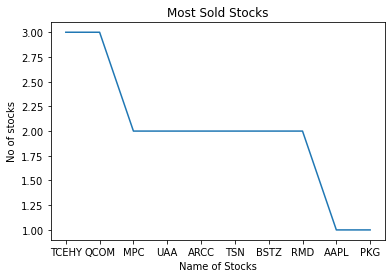

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
#dates = matplotlib.dates.date2num(pur['date'])
plt.plot(sale_ticker['ticker'][0:10], sale_ticker['index'][0:10],linestyle ='solid') ##
plt.title('Most Sold Stocks')#adding Title to the plot
plt.xlabel('Name of Stocks') # Plotting X axis
plt.ylabel('No of stocks') ## Plotting Y axis
plt.show()

From the above graph, we can analyze that out of the most sold 10 stocks by the senator, TCEHY and QCOM are the most sold stocks among the ten stocks sold.





### Analyse Sale and Purchase History by Month

We decided to check the senator stock sale and purchase history by Month, to find anything interesting.

In [ ]:
#importing the date class
from datetime import datetime
pur['month'] = pur['date'].apply(lambda x: x.strftime('%m')) ## Using the lamda function to pull out the months values from the date column in the above dataframe.

In [ ]:
##Grouping by month
pur_month=pur.groupby(['month']).agg({"index": 'sum',"cost":'mean'}) ## groupby month  
pur_month =  pur_month.reset_index() ## INDEX

## Month-wise Trend (Purchase and Sale)


 Plotting the trend for pur stocks month-wise by senator




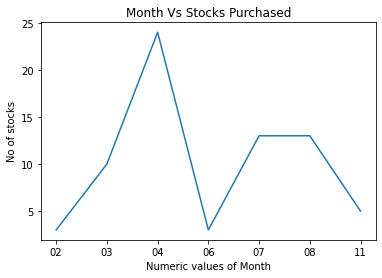

In [ ]:
import matplotlib.pyplot as plt   # to import matplotlib from python library
import matplotlib
dates = matplotlib.dates.date2num(pur['date'])
plt.plot(pur_month['month'], pur_month['index'],linestyle ='solid')       # defining style of line to be plotted
plt.title('Month Vs Stocks Purchased') #adding title to the plot
plt.xlabel('Numeric values of Month') # Plotting X axis
plt.ylabel('No of stocks') #plotting Y axis
plt.show()

From the trend we can analyse that the february and june month was the least purchased month for purchasing the stocks whereas April was the highest purchased month.




In [ ]:
from datetime import datetime           # import datetime function
sale['month'] = sale['date'].apply(lambda x: x.strftime('%m'))
sale_month=sale.groupby(['month']).agg({"index": 'sum',"cost":'mean'})  # group month and ticker column of sold stocks based on aggregerate function of count,cost and means
sale_month =  sale_month.reset_index()

 Plotting the trend for selling stocks month-wise by senator





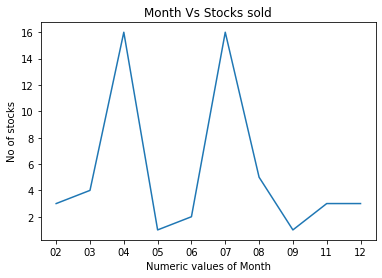

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
dates = matplotlib.dates.date2num(sale['date'])
plt.plot(sale_month['month'], sale_month['index'],linestyle ='solid')
plt.title('Month Vs Stocks sold') # adding title to the plot
plt.xlabel('Numeric values of Month') # plotting X axis
plt.ylabel('No of stocks') # Plotting Y axis
plt.show()

From the trend we can analyse that the May and September month was the least purchased month for purchasing the stocks whereas April and July was the highest purchased month.

In [ ]:
sale_stock=sale.groupby(['month','ticker']).agg({"index": 'count',"cost":'mean'}) # groupby function used to group month and ticker column of sold stocks based on aggregerate function of count,cost and means
pur_stock=pur.groupby(['month','ticker']).agg({"index": 'count',"cost":'mean'})   #groupby function used to group month and ticker column of purchased sstocks based on aggregerate function of count,cost and means
sale_stock = sale_stock.sort_values(by='index', ascending=False)
pur_stock = pur_stock.sort_values(by='index', ascending=False)

In [ ]:
sale_stock =  sale_stock.reset_index()   # index resseted for sale stock
pur_stock =  pur_stock.reset_index()      # index resetted for purchased stocks

## Reason for our selection of Top 10 Stocks

We have chosen 10 stocks based on the four graphs above:

Graph 1: Most Purchased Stocks, We can see that CEF is our most purchased stock in the senator profile, So we decided that stock would be a stock of interest and their might be reason on why the senator purchases this Company stock multiple time. So we choose on stock CEF from here.

Graph 2: Most Sold Stocks, we can see that TCEHY is our most sold stock in the senator profile, so we decided that stock would be a stock interest and their might be another reason behind it on why the senator sold this stock multiple times across his entire history. So, we choose TCEHY as another stock in our portfolio.

Graph 3: Month vs Stock Purchased, we can see from the trend, in the graph, the senator purchases his most stock in April and least purchases are done in February and June. We wanted to further analyze the stock he bought during this peak and trough, we decided to take the two highest purchased stocks in April which are SWKS and CVS, and most purchased stocks in February and June which are HQL and BSTZ respectively.

Graph 4: Month vs Stocks Sold, we can see from the trend, in the graph, the senator sold the greatest number of  stock in April and July and least number were sold in May and September. We wanted to further analyze the stock he bought during these peaks and troughs, we decided to take the highest purchased stocks in April and July  which are HPQ and APO respectively , and most purchased stocks in May and September which are VGR and MDT respectively.So our final 10 stock for our portfolio allocation are below.

The Code below shows the same below:

In [ ]:
## 4 Stocks based on Senator Purchasing History by Month
print(pur_stock['ticker'][pur_stock['month'] == '04'].iloc[0:2]) 
print(pur_stock['ticker'][pur_stock['month'] == '02'].iloc[0])
print(pur_stock['ticker'][pur_stock['month'] == '06'].iloc[0])

0    SWKS
1     CVS
Name: ticker, dtype: object
HQL
BSTZ


In [ ]:
## 4 Stocks based on Senator Sale History by Month
print(sale_stock['ticker'][sale_stock['month'] == '04'].iloc[0:1])
print(sale_stock['ticker'][sale_stock['month'] == '07'].iloc[0:1])
print(sale_stock['ticker'][sale_stock['month'] == '05'].iloc[0:1])
print(sale_stock['ticker'][sale_stock['month'] == '09'].iloc[0:1])

28    HPQ
Name: ticker, dtype: object
2    APO
Name: ticker, dtype: object
49    VGR
Name: ticker, dtype: object
20    MDT
Name: ticker, dtype: object


In [ ]:
print(pur_ticker['ticker'].iloc[0])       # Most Purchased Stocks of Senator (Frequency)
print(sale_ticker['ticker'].iloc[0])      # Most Sold Stocks of Senator (Frequency)

CEF
TCEHY


### Top 10 Stocks we found are below:


SWKS - Skyworks Solutions, Inc - (SemiConductor)

CVS - CVS Health Corporation - (Healthcare)

HQL - Tekla Life Sciences Investors - (Financial Services)

BSTZ - BlackRock Science and Technology Trust II - (Sector Not Defined)

HPQ - HP Inc - (Technology Services)

APO - Apollo Global Management, Inc - (Financial Services)

VGR - Vector Group Ltd - (Consumer Defensive)

MDT - Medtronic plc - (Healthcare)

CEF - Sprott Physical Gold and Silver Trust - (Financial Service)

TCEHY - Tencent Holdings Limited - (Communication Services)

# Nonlinear Optimization: Portfolio Allocation

# Risk Vs Return Trade-off

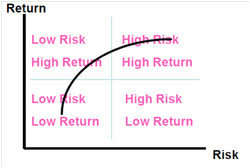


The performance of individual stocks can be measured in two ways: return and risk. Return is the percentage growth in the value of the stock. Risk is the variability associated with the returns on the stock. The information on which stock performance is evaluated is a series of historical returns, typically compiled on a monthly basis. This history provides an empirical distribution of a stock’s return performance. For stock  k  in the portfolio, this return distribution can be summarized by a mean ( rk ) and a standard deviation ( sk ). The performance of a portfolio of stocks is also measured in terms of return and risk. When we create a portfolio of stocks, our goals are usually to maximize the mean return and to minimize the risk. Both goals cannot be met simultaneously, but we can use optimization to explore the trade-offs involved.

## Extract Historical Stock Market Data

In [ ]:
#  Import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Import packages to extract data from yahoo finance
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 103 kB 47.1 MB/s 
     |████████████████████████████████| 127 kB 39.8 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=5d7f7f89a64e269e6ef23d32c19918248a5302ac1868ad1b5d2c7f3c9086b87f
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=d5752c58863b55cbfc49f3385b17ce9f98ab2bdc997e3ff1fa0240befd8b992d
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=36011119479d8b02266ea32ad24b9bcbb566541dbc3805cba21f412083aa41aa
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

Extract daily stock data

In [ ]:
# Assign the ticker list that we want to scrap
#Stocks selected are 'SWKS','CVS','HQL','BSTZ,'HPQ','APO','VGR','MDT','CEF','TCEHY'
tickers_list = ['SWKS','CVS','HQL','BSTZ','HPQ','APO','VGR','MDT','CEF','TCEHY' ] #list of stocks
# pull historical price data for each stocks 
stock_prices = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# Show Results of stock price
stock_prices

{'APO':                  open       high        low  ...   adjclose   volume  ticker
 2015-01-02  23.700001  23.889999  23.240000  ...  15.217555   395700     APO
 2015-01-05  23.389999  23.459999  22.540001  ...  14.752700   982700     APO
 2015-01-06  22.510000  22.809999  21.980000  ...  14.287843  1203700     APO
 2015-01-07  22.299999  23.090000  22.219999  ...  14.707503  1047500     APO
 2015-01-08  23.010000  23.830000  22.790001  ...  15.378962   889000     APO
 ...               ...        ...        ...  ...        ...      ...     ...
 2020-02-24  44.060001  45.240002  43.599998  ...  42.272820  2475000     APO
 2020-02-25  45.240002  45.369999  43.060001  ...  40.625950  1978500     APO
 2020-02-26  43.070000  43.660000  42.650002  ...  40.654182  1862300     APO
 2020-02-27  42.220001  43.939999  40.959999  ...  39.816635  2833700     APO
 2020-02-28  40.900002  41.880001  39.779999  ...  39.204941  4728900     APO
 
 [1298 rows x 7 columns],
 'BSTZ':                  ope

In [ ]:
# let's extract just the data we need (adjclose) (closing price of stocks)
# get the adjclose price for the NFLX (one sample)

prep = pd.DataFrame(stock_prices['SWKS']['adjclose']).rename(columns = {"adjclose":"SWKS"})

# combine and do the same for all the tickers
for i in tickers_list[1:]:
  prep[i] = pd.DataFrame(stock_prices[i]['adjclose'])
prep

,SWKS,CVS,HQL,BSTZ,HPQ,APO,VGR,MDT,CEF,TCEHY
2015-01-02,66.532219,79.819763,13.447624,NaN,14.860408,15.217555,9.420016,62.566219,11.642060,14.125814
2015-01-05,65.452385,79.030830,13.254058,NaN,14.612980,14.752700,9.367095,62.305077,11.721868,14.341926
2015-01-06,63.365322,79.089561,13.350840,NaN,14.502193,14.287843,9.278893,61.991737,11.951318,15.019728
2015-01-07,64.408836,80.516418,13.689584,NaN,14.672068,14.707503,9.371507,63.541096,12.051078,15.943115
2015-01-08,67.330757,82.228630,13.953058,NaN,15.022892,15.378962,9.627294,65.064339,11.891461,16.306574
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,109.022995,64.633316,15.072766,18.829571,20.900133,42.272820,11.817943,107.159622,15.950000,49.146076
2020-02-25,104.100822,61.217033,14.632748,18.408091,22.082268,40.625950,11.253905,104.445740,15.780000,50.140736
2020-02-26,101.786812,59.618324,14.805304,18.463068,21.477015,40.654182,11.128565,102.155319,15.750000,50.777317
2020-02-27,95.658630,56.458984,14.302084,17.812504,20.692074,39.816635,10.689868,97.179871,15.700000,49.573780


In [ ]:
#Check shape of the resulting dataframe with stock data scrapped from yahoo finance
prep.shape

(1298, 10)

In [ ]:
# create monthly return features for each ticker, 
# we will just use a pct_change as the return
df2=pd.DataFrame()
for i in tickers_list:
  df2[i] = prep[i].pct_change()
# drop the na records
df2.dropna(inplace=True)
df2

,SWKS,CVS,HQL,BSTZ,HPQ,APO,VGR,MDT,CEF,TCEHY
2019-06-27,0.014636,0.019367,0.007251,-0.006944,-0.002405,0.021778,0.008377,0.002674,-0.003017,0.009121
2019-06-28,0.004159,-0.004567,0.010798,0.038911,0.002411,0.001460,0.012461,-0.000923,0.000756,-0.002205
2019-07-01,0.060049,0.008075,0.007122,0.046685,0.009620,0.028572,-0.014359,0.007290,-0.013605,0.026955
2019-07-02,-0.013063,-0.002367,-0.001179,-0.000919,0.003335,0.011621,-0.014568,-0.000510,0.013027,-0.005809
2019-07-03,-0.001855,0.007299,0.008260,-0.002298,0.004749,-0.000841,0.019007,0.007751,0.003782,-0.001082
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-0.030010,-0.050203,-0.021836,-0.045518,-0.026432,-0.016853,-0.020045,-0.017037,0.010133,-0.040023
2020-02-25,-0.045148,-0.052856,-0.029193,-0.022384,0.056561,-0.038958,-0.047727,-0.025326,-0.010658,0.020239
2020-02-26,-0.022229,-0.026115,0.011792,0.002987,-0.027409,0.000695,-0.011138,-0.021929,-0.001901,0.012696
2020-02-27,-0.060206,-0.052993,-0.033989,-0.035236,-0.036548,-0.020602,-0.039421,-0.048705,-0.003175,-0.023702


## Portfolio Allocation

Now using the monthly returns for each of the stocks we have extracted above, we proceed with the prtfolio allocation. 

We calculate our portfolio allocation by calculating the optimum risk ceiling level. We also plot the subsequent efficient frontier plot.

In [ ]:
# import required modules
import matplotlib.pyplot as plt
from pylab import *

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.1 MB 5.3 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 


In [ ]:
# we will use the dataframe which has the portfolio information of the senator from above 
df2.reset_index(drop=True, inplace=True)
df2

,SWKS,CVS,HQL,BSTZ,HPQ,APO,VGR,MDT,CEF,TCEHY
0,0.014636,0.019367,0.007251,-0.006944,-0.002405,0.021778,0.008377,0.002674,-0.003017,0.009121
1,0.004159,-0.004567,0.010798,0.038911,0.002411,0.001460,0.012461,-0.000923,0.000756,-0.002205
2,0.060049,0.008075,0.007122,0.046685,0.009620,0.028572,-0.014359,0.007290,-0.013605,0.026955
3,-0.013063,-0.002367,-0.001179,-0.000919,0.003335,0.011621,-0.014568,-0.000510,0.013027,-0.005809
4,-0.001855,0.007299,0.008260,-0.002298,0.004749,-0.000841,0.019007,0.007751,0.003782,-0.001082
...,...,...,...,...,...,...,...,...,...,...
165,-0.030010,-0.050203,-0.021836,-0.045518,-0.026432,-0.016853,-0.020045,-0.017037,0.010133,-0.040023
166,-0.045148,-0.052856,-0.029193,-0.022384,0.056561,-0.038958,-0.047727,-0.025326,-0.010658,0.020239
167,-0.022229,-0.026115,0.011792,0.002987,-0.027409,0.000695,-0.011138,-0.021929,-0.001901,0.012696
168,-0.060206,-0.052993,-0.033989,-0.035236,-0.036548,-0.020602,-0.039421,-0.048705,-0.003175,-0.023702


We will make a dataframe for the mean of each column in df2, and the sd for each column in df2.

Notice how some stocks have a high return (computer), but that it also has a high standard deviation! Too much risk might be uncomfortable for an investor

In [ ]:
Avg_Return = pd.DataFrame(np.mean(df2) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df2) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

       Avg_Return
SWKS     0.001948
CVS      0.000837
HQL      0.000196
BSTZ     0.000026
HPQ      0.000254
APO      0.001754
VGR      0.002123
MDT      0.000355
CEF      0.000682
TCEHY    0.000708
       Std_Dev_Return
SWKS         0.021244
CVS          0.016058
HQL          0.010322
BSTZ         0.013370
HPQ          0.017406
APO          0.020053
VGR          0.025081
MDT          0.010900
CEF          0.010858
TCEHY        0.015675


##Covariance and Modern Portfolio Theory

A way that we can balance our portfolio is to look at how different stocks vary with each other.

Remember - covariance is related to correlation - but is not the same thing! Covariance is a numeric representation of how much things vary together. Correlation is covariance divided by standard devation.

In [ ]:
# Here's the covariance matrix
# Using the dataframe df2 from previous steps
Covariance_matrix = df2.cov()
Covariance_matrix

,SWKS,CVS,HQL,BSTZ,HPQ,APO,VGR,MDT,CEF,TCEHY
SWKS,0.000454,0.000159,0.000118,0.000126,0.000100,0.000224,0.000128,0.000100,-0.000072,0.000179
CVS,0.000159,0.000259,0.000079,0.000069,0.000084,0.000096,0.000093,0.000075,-0.000035,0.000077
HQL,0.000118,0.000079,0.000107,0.000062,0.000055,0.000076,0.000074,0.000050,-0.000014,0.000064
BSTZ,0.000126,0.000069,0.000062,0.000180,0.000083,0.000078,0.000035,0.000054,-0.000026,0.000079
HPQ,0.000100,0.000084,0.000055,0.000083,0.000305,0.000054,0.000013,0.000038,-0.000030,0.000100
APO,0.000224,0.000096,0.000076,0.000078,0.000054,0.000405,0.000114,0.000078,-0.000017,0.000094
VGR,0.000128,0.000093,0.000074,0.000035,0.000013,0.000114,0.000633,0.000063,0.000013,0.000065
MDT,0.000100,0.000075,0.000050,0.000054,0.000038,0.000078,0.000063,0.000120,-0.000008,0.000052
CEF,-0.000072,-0.000035,-0.000014,-0.000026,-0.000030,-0.000017,0.000013,-0.000008,0.000119,-0.000029
TCEHY,0.000179,0.000077,0.000064,0.000079,0.000100,0.000094,0.000065,0.000052,-0.000029,0.000247


Correlation Matrix as below

In [ ]:
#Print correlation matrix
Corr_matrix = df2.corr()
Corr_matrix

,SWKS,CVS,HQL,BSTZ,HPQ,APO,VGR,MDT,CEF,TCEHY
SWKS,1.000000,0.464786,0.533197,0.440501,0.270077,0.522183,0.239459,0.427986,-0.310539,0.533345
CVS,0.464786,1.000000,0.475303,0.319886,0.300490,0.295890,0.230648,0.424000,-0.198511,0.303413
HQL,0.533197,0.475303,1.000000,0.448128,0.302076,0.363183,0.285810,0.443139,-0.128580,0.392939
BSTZ,0.440501,0.319886,0.448128,1.000000,0.353633,0.289416,0.102525,0.367275,-0.177138,0.374294
HPQ,0.270077,0.300490,0.302076,0.353633,1.000000,0.153083,0.030274,0.201078,-0.155579,0.364693
APO,0.522183,0.295890,0.363183,0.289416,0.153083,1.000000,0.225684,0.354410,-0.077702,0.298666
VGR,0.239459,0.230648,0.285810,0.102525,0.030274,0.225684,1.000000,0.228519,0.048896,0.163942
MDT,0.427986,0.424000,0.443139,0.367275,0.201078,0.354410,0.228519,1.000000,-0.066185,0.305244
CEF,-0.310539,-0.198511,-0.128580,-0.177138,-0.155579,-0.077702,0.048896,-0.066185,1.000000,-0.168648
TCEHY,0.533345,0.303413,0.392939,0.374294,0.364693,0.298666,0.163942,0.305244,-0.168648,1.000000


##Building  the Nonlinear Optimization Model

First, we specify the ConcreteModel. Then we specify our decision variables and BOUND THEM (between 0 and 1) - this is very important for a nonlinear solver so it doesn't go down the rabbit hole!

In [ ]:
# creating covariance table on stock return dataframe
df2_cov = df2.cov()
print('Covariance Matrix:')
print(df2_cov)
print('\n') # return/blank line

# create the average of each stock
# these are coefficients of the objective function.
df2_return = df2.mean()
print('Average Return:')
print(df2_return)

Covariance Matrix:
           SWKS       CVS       HQL  ...       MDT       CEF     TCEHY
SWKS   0.000454  0.000159  0.000118  ...  0.000100 -0.000072  0.000179
CVS    0.000159  0.000259  0.000079  ...  0.000075 -0.000035  0.000077
HQL    0.000118  0.000079  0.000107  ...  0.000050 -0.000014  0.000064
BSTZ   0.000126  0.000069  0.000062  ...  0.000054 -0.000026  0.000079
HPQ    0.000100  0.000084  0.000055  ...  0.000038 -0.000030  0.000100
APO    0.000224  0.000096  0.000076  ...  0.000078 -0.000017  0.000094
VGR    0.000128  0.000093  0.000074  ...  0.000063  0.000013  0.000065
MDT    0.000100  0.000075  0.000050  ...  0.000120 -0.000008  0.000052
CEF   -0.000072 -0.000035 -0.000014  ... -0.000008  0.000119 -0.000029
TCEHY  0.000179  0.000077  0.000064  ...  0.000052 -0.000029  0.000247

[10 rows x 10 columns]


Average Return:
SWKS     0.001948
CVS      0.000837
HQL      0.000196
BSTZ     0.000026
HPQ      0.000254
APO      0.001754
VGR      0.002123
MDT      0.000355
CEF      0.000

First, we specify the ConcreteModel. Then we specify our decision variables and BOUND THEM (between 0 and 1)

In [ ]:
#import pyomo concrete model
from pyomo.environ import *

m = ConcreteModel()

# defining variables
# each variable in the model is a stock 
m.SWKS = Var(within=NonNegativeReals, bounds=(0,1))
m.CVS = Var(within=NonNegativeReals, bounds=(0,1))
m.HQL = Var(within=NonNegativeReals, bounds=(0,1))
m.BSTZ = Var(within=NonNegativeReals, bounds=(0,1))
m.HPQ = Var(within=NonNegativeReals, bounds=(0,1))
m.APO = Var(within=NonNegativeReals, bounds=(0,1))
m.VGR = Var(within=NonNegativeReals, bounds=(0,1))
m.MDT = Var(within=NonNegativeReals, bounds=(0,1))
m.CEF = Var(within=NonNegativeReals, bounds=(0,1))
m.TCEHY = Var(within=NonNegativeReals, bounds=(0,1))

## Risk Ceiling

We ran the model multiple times roughly 10 to 15 times with different values for return_floor and risk ceiling combinations.

We start with the default values of return_floor = 0.015 as in the 
Ms. Womack example and risk_limits = np.arange(0.001, 0.015, 0.00005)
The below is the resulting Efficient Frontier Plot:

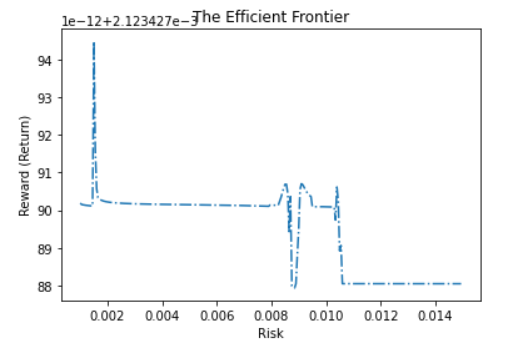

As we can see that our returns decrease after 0.002 risk level we try to change the risk limits.
The risk_limit we take now = (0.0001, 0.0015, 0.00005), with max_risk = 0.0015 and re-run the model, the results are as below:

In [ ]:
# declare objective
#df2_return
m.objective = Objective(expr =               
                        m.SWKS*df2_return[0] + 
                        m.CVS*df2_return[1] + 
                        m.HQL*df2_return[2] +
                        m.BSTZ*df2_return[3] + 
                        m.HPQ*df2_return[4]+
                        m.APO*df2_return[5]+
                        m.VGR*df2_return[6]+
                        m.MDT*df2_return[7]+
                        m.CEF*df2_return[8]+
                        m.TCEHY*df2_return[9],
                        sense=maximize) # maximize our returns

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.SWKS + m.CVS + m.HQL + m.BSTZ +  m.HPQ + m.APO + m.VGR + m.MDT + m.CEF + m.TCEHY == 1)

# 2. Minimum return should be 0.0015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.0015)

Risk is Prop(A)Prop(B)Cov(A,B).

It's a square matrix, just like covariance.

Risk = the sum of all values in this intermediate matrix.

In [ ]:
# Creating calculations table for calculate the risk
# Max risk should be less than 0.0015
max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [m.SWKS, m.CVS, m.HQL, m.BSTZ, m.HPQ, m.APO, m.VGR, m.MDT,m.CEF,m.TCEHY]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  for index, col in enumerate(df2_cov.columns):
    i = 0
    risk = []
    for row in df2_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# this is a sequence of options - better!
risk_limits = np.arange(0.0001, 0.0015, 0.00005) # taking much smaller steps to get a smoother curve for better visualization
risk_limits

array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145])

## Execute the Model

In [ ]:
# updating risk contraint for each limit and then solving the problem

#generate dictionary for parameter analysis
param_analysis = {} # key=risk, value =stock allocations 

#generate dictionary for returns
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.SWKS(), m.CVS(), m.HQL(), m.BSTZ(), m.HPQ(), m.APO(), m.VGR(), m.MDT(),m.CEF(),m.TCEHY()]
  # store our returns
  returns[r] =  m.SWKS()*df2_return[0] + m.CVS()*df2_return[1] + m.HQL()*df2_return[2] + m.BSTZ()*df2_return[3] + m.HPQ()*df2_return[4] + m.APO()*df2_return[5] + m.VGR()*df2_return[6] + m.MDT()*df2_return[7]  + m.CEF()*df2_return[8]  + m.TCEHY()*df2_return[9] 

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Parameter Analysis
Let's see what the efficient frontier looks like, and the stock allocation plots.

<Figure size 12800x12800 with 0 Axes>

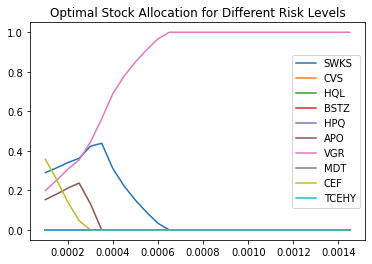

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['SWKS', 'CVS', 'HQL', 'BSTZ', 'HPQ', 'APO', 'VGR', 'MDT','CEF','TCEHY'] #select the tickers of the stock, i.e the column names.
param_analysis
plt.figure(figsize=(16, 16), dpi=800)
param_analysis.plot()

plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

###Interpret Stock Allocation Plot
From the above plot we can see that we see good returns at a optimum risk level of 3% if we invest in the WW International stock as compared to the other stocks.

Therefore for the highest returns, optimum allocation would be to invest all our money into the WW International Stock among these top 10 stocks.

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name, print the reward the values to see if the code worked. 

[0.0001, 0.00015000000000000001, 0.00020000000000000004, 0.00025, 0.00030000000000000003, 0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003]
[0.0014999900098254194, 0.0016347192381335443, 0.0017828222678177485, 0.0019050642801024206, 0.002000215377763271, 0.0020467045479900764, 0.002069240575349887, 0.0020846425982991228, 0.002097134255205637, 0.0021079240980128107, 0.0021175615704449374, 0.002123401440388218, 0.002123401433735656, 0.00212341740434929, 0.0021234174036851494, 0.002123403165398069, 0.0021234022300768026, 0.00212340

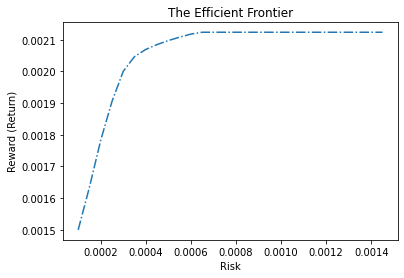

In [ ]:
#show plots
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

###Interpret Efficient Frontier Plot


At a certain point, taking on more risk doesn't increase your returns! This occurs at ~Risk = 0.0006 (slightly over 0.006) which achieves a max return of 0.21% after which the there is negligible return or constant return even if we take on more risk.

This plot also verifies our insights we see from the stock allocation plot above for the VGR stock.

# Analyze S&P 500 and Dow Jones Indices stock allocations

Using the One risk level from the efficient frontier plot above, Create a table that shows the price of your stocks on the first day of each month from Jan 1, 2021 (when you would have done your allocation), Feb 1, 2021 ... through October 1, 2021 (when we imagine you sold your stocks) that comes from that risk level. 

Looking at the efficient frontier from above, we do not have any gain in returns after a risk = 0.0006. We are able to arrive at this conclusion as we set our **max_risk = 0.0015**, hence we set the same for analyzing the stocks from the S&P and Dow Jones indices as well.

##S&P 500 INDEX
We start by choosing popular stocks from S&P 500, looking at a diversified portfolio stocks choosen are as follows: 


*   JPMorgan Chase & Co (JPM) (Financial Sector)
*   Nvidia Corp. (NVDA) (Semiconductor)
*   Tesla (TSLA) (Auto and Tech)
*   Apple Inc. (AAPL)  (Product & Technology Services)
*   Amazon.com, Inc. (AMZN) (Product & Technology Services)

Referrence: https://www.investopedia.com/top-10-s-and-p-500-stocks-by-index-weight-4843111

**The above stocks selected are a similar profile of sectors from those of the top 10 stocks of the senator above**

In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Oct 1, 2021

# Assign the ticker list that we want to scrap
#Stocks selected are 'JPM', 'NVDA', 'TSLA', 'AAPL', 'AMZN'
tickers_list = ['JPM', 'NVDA', 'TSLA', 'AAPL', 'AMZN']
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/01/2021',interval='1mo') for ticker in tickers_list}

In [ ]:
#see results
sp_prices

{'AAPL':                   open        high         low  ...    adjclose      volume  ticker
 2021-01-01  133.520004  145.089996  126.379997  ...  131.151489  2240262000    AAPL
 2021-02-01  133.750000  137.880005  118.389999  ...  120.517036  1833855600    AAPL
 2021-03-01  123.750000  128.720001  116.209999  ...  121.583000  2650418200    AAPL
 2021-04-01  123.660004  137.070007  122.489998  ...  130.849792  1889857500    AAPL
 2021-05-01  132.039993  134.070007  122.250000  ...  124.031586  1711934900    AAPL
 2021-06-01  125.080002  137.410004  123.129997  ...  136.555817  1606590000    AAPL
 2021-07-01  136.600006  150.000000  135.759995  ...  145.429535  1918976500    AAPL
 2021-08-01  146.360001  153.490005  144.500000  ...  151.381927  1460744100    AAPL
 2021-09-01  152.830002  157.259995  141.270004  ...  141.293793  1797465800    AAPL
 
 [9 rows x 7 columns],
 'AMZN':                    open         high          low  ...     adjclose    volume  ticker
 2021-01-01  3270.0000

In [ ]:
#extracting just the data we need
sp_prep = pd.DataFrame(sp_prices['JPM']['adjclose']).rename(columns = {"adjclose":"JPM"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
sp_prep

,JPM,NVDA,TSLA,AAPL,AMZN
2021-01-01,125.517960,129.800049,793.530029,131.151489,3206.199951
2021-02-01,144.598679,137.042099,675.500000,120.517036,3092.929932
2021-03-01,149.570267,133.382355,667.929993,121.583000,3094.080078
2021-04-01,151.122665,150.034149,709.440002,130.849792,3467.419922
2021-05-01,162.320847,162.379150,625.219971,124.031586,3223.070068
2021-06-01,153.722504,199.943893,679.700012,136.555817,3440.159912
2021-07-01,150.006454,194.955627,687.200012,145.429535,3327.590088
2021-08-01,158.991928,223.810532,735.719971,151.381927,3470.790039
2021-09-01,162.709534,207.160004,775.479980,141.293793,3285.040039


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,JPM,NVDA,TSLA,AAPL,AMZN
2021-02-01,0.152016,0.055794,-0.148740,-0.081085,-0.035328
2021-03-01,0.034382,-0.026705,-0.011207,0.008845,0.000372
2021-04-01,0.010379,0.124843,0.062147,0.076218,0.120663
2021-05-01,0.074100,0.082281,-0.118713,-0.052107,-0.070470
2021-06-01,-0.052971,0.231340,0.087137,0.100976,0.067355
2021-07-01,-0.024174,-0.024948,0.011034,0.064982,-0.032722
2021-08-01,0.059901,0.148008,0.070605,0.040930,0.043034
2021-09-01,0.023382,-0.074396,0.054042,-0.066640,-0.053518


In [ ]:
#drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,JPM,NVDA,TSLA,AAPL,AMZN
0,0.152016,0.055794,-0.148740,-0.081085,-0.035328
1,0.034382,-0.026705,-0.011207,0.008845,0.000372
2,0.010379,0.124843,0.062147,0.076218,0.120663
3,0.074100,0.082281,-0.118713,-0.052107,-0.070470
4,-0.052971,0.231340,0.087137,0.100976,0.067355
5,-0.024174,-0.024948,0.011034,0.064982,-0.032722
6,0.059901,0.148008,0.070605,0.040930,0.043034
7,0.023382,-0.074396,0.054042,-0.066640,-0.053518


In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
print('Average Return:')
print(sp_return)

Covariance Matrix:
           JPM      NVDA      TSLA      AAPL      AMZN
JPM   0.003975 -0.001063 -0.004394 -0.003473 -0.001734
NVDA -0.001063  0.010636  0.002271  0.003897  0.004499
TSLA -0.004394  0.002271  0.007974  0.004517  0.003820
AAPL -0.003473  0.003897  0.004517  0.004950  0.003612
AMZN -0.001734  0.004499  0.003820  0.003612  0.004415


Average Return:
JPM     0.034627
NVDA    0.064527
TSLA    0.000788
AAPL    0.011515
AMZN    0.004923
dtype: float64


In [ ]:
#Build the Model

m = ConcreteModel()

# defining variables
# each one is a stock
m.JPM = Var(within=NonNegativeReals, bounds=(0,1))
m.NVDA = Var(within=NonNegativeReals, bounds=(0,1))
m.TSLA = Var(within=NonNegativeReals, bounds=(0,1))
m.AAPL = Var(within=NonNegativeReals, bounds=(0,1))
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.JPM*sp_return[0] + 
                        m.NVDA*sp_return[1] + 
                        m.TSLA*sp_return[2] +
                        m.AAPL*sp_return[3] + 
                        m.AMZN*sp_return[4],
                        sense=maximize) # we want to maximize our returns

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.JPM + m.NVDA + m.TSLA + m.AAPL + m.AMZN == 1)

# 2. Minimum return should be 0.015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.015)

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015 # from the modeling the stock returns of the senator
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.JPM, m.NVDA, m.TSLA, m.AAPL, m.AMZN]
  risksp_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 5 stocks, there are 5*5 = 25 elements
  # sum these 25 elements up at the end! that's the risk.
  for index, col in enumerate(sp_cov.columns):
    i = 0
    risksp = []
    for row in sp_cov[col]:
      risksp.append(proportions[index]*row*proportions[i])
      i = i + 1
    risksp_matrix.append(risksp)
  risksp_matrix = pd.DataFrame(risksp_matrix)
  return risksp_matrix.sum().sum() 

# this is a sequence of options - better!
risk_limitssp = np.arange(0.0001, 0.015, 0.00005) # taking very tiny steps
risk_limitssp

array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145,
       0.0015 , 0.00155, 0.0016 , 0.00165, 0.0017 , 0.00175, 0.0018 ,
       0.00185, 0.0019 , 0.00195, 0.002  , 0.00205, 0.0021 , 0.00215,
       0.0022 , 0.00225, 0.0023 , 0.00235, 0.0024 , 0.00245, 0.0025 ,
       0.00255, 0.0026 , 0.00265, 0.0027 , 0.00275, 0.0028 , 0.00285,
       0.0029 , 0.00295, 0.003  , 0.00305, 0.0031 , 0.00315, 0.0032 ,
       0.00325, 0.0033 , 0.00335, 0.0034 , 0.00345, 0.0035 , 0.00355,
       0.0036 , 0.00365, 0.0037 , 0.00375, 0.0038 , 0.00385, 0.0039 ,
       0.00395, 0.004  , 0.00405, 0.0041 , 0.00415, 0.0042 , 0.00425,
       0.0043 , 0.00435, 0.0044 , 0.00445, 0.0045 , 0.00455, 0.0046 ,
       0.00465, 0.0047 , 0.00475, 0.0048 , 0.00485, 0.0049 , 0.00495,
       0.005  , 0.00

In [ ]:
#Run the Model
param_sp = {} # key=risk, value =stock allocations 
returnssp = {} # key=risk, value = return
for r in risk_limitssp:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_sp[r] = [m.JPM(), m.NVDA(), m.TSLA(), m.AAPL(), m.AMZN()]
  # store our returns
  returnssp[r] =  m.JPM()*sp_return[0] + m.NVDA()*sp_return[1] + m.TSLA()*sp_return[2] + m.AAPL()*sp_return[3] + m.AMZN()*sp_return[4]


Streaming output truncated to the last 5000 lines.
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 5
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02982783317565918
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

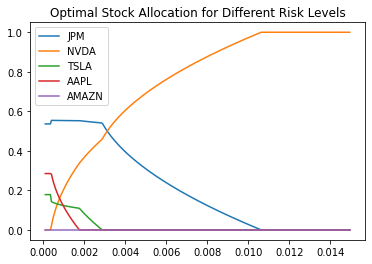

In [ ]:
#Parameter Analysis
# generating the dataframe for proportions of the portfolio for each risk limit
param_sp = pd.DataFrame.from_dict(param_sp, orient='index')
param_sp.columns = [ 'JPM', 'NVDA', 'TSLA', 'AAPL', 'AMAZN']
param_sp.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

####Inference from Stock Allocation Plot

On the lefthand side, we have low risk and high diversity. 

On the righthand side, we have high risk and low diversity.

From the plot allocation we can see that we would receive the best return on investment for the Nvidia stock from among the set of 5 stocks we have choosen.
Let us further evaluate the Efficient Frontier to validate the results we see in the Stock Allocation Plot.



In [ ]:
# subset
risk = list(returnssp.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returnssp.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0001, 0.00015000000000000001, 0.00020000000000000004, 0.00025, 0.00030000000000000003, 0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003, 0.0020000000000000005, 0.00205, 0.0021000000000000003, 0.00215, 0.0022, 0.0022500000000000003, 0.0023000000000000004, 0.00235, 0.0024000000000000002, 0.002450000000

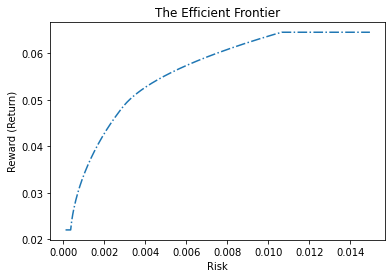

In [ ]:
# Show Efficient Frontier Plot
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

### Inference from Efficient Frontier
We see that by selecting the Nvidia Stock we can make a maximum return of ~6.5% (great returns) at a risk level of 0.011. Post this risk level our returns do not increase even if we take on more risk.   
This validates what we have seen in the stock allocation plot and I would put all my money in the Nvidia stock to get the maximum returns.

##Dow Jones INDEX

Coming to dow jones index we select the below list of stocks to perfom our analysis

* American Express (AXP) (Financial Services)
* Intel Corporation (INTC) (Semiconductors)
* Goldman Sachs (GS) (Financial Services)
* Merck (MRK) (Healthcare)
* Microsoft (MSFT) (Product & Technology Services)


Referrence: https://www.investors.com/research/dow-jones-stocks/

**The above stocks selected are a similar profile of sectors from those of the top 10 stocks of the senator above**

In [ ]:
#Scrapping Stock data from Yahoo Finance from Jan 1 2021 to Oct 1, 2021

# Assign the ticker list that we want to scrap
#Stocks selected are 'AXP', 'DIS', 'GS'. 'MRK', 'MSFT'
tickers_list = ['AXP', 'INTC', 'GS', 'MRK', 'MSFT']
# pull historical price data for each stocks to match with our news score later
dw_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/01/2021',interval='1mo') for ticker in tickers_list}

In [ ]:
#see results
dw_prices

{'AXP':                   open        high         low  ...    adjclose    volume  ticker
 2021-01-01  121.300003  129.539993  112.099998  ...  114.920296  88363200     AXP
 2021-02-01  117.699997  140.949997  117.000000  ...  134.170166  63958300     AXP
 2021-03-01  138.179993  151.460007  135.130005  ...  140.300385  79164400     AXP
 2021-04-01  142.339996  155.080002  140.679993  ...  152.571625  59479600     AXP
 2021-05-01  154.589996  160.690002  151.720001  ...  159.317215  56085700     AXP
 2021-06-01  162.509995  170.410004  157.250000  ...  164.391327  74352400     AXP
 2021-07-01  165.649994  179.669998  161.479996  ...  169.664413  87624900     AXP
 2021-08-01  171.139999  173.360001  157.330002  ...  165.548462  75388900     AXP
 2021-09-01  166.339996  178.800003  156.800003  ...  167.114563  77243000     AXP
 
 [9 rows x 7 columns],
 'GS':                   open        high         low  ...    adjclose    volume  ticker
 2021-01-01  267.000000  309.410004  260.160004  

In [ ]:
#extracting just the data we need
dw_prep = pd.DataFrame(dw_prices['AXP']['adjclose']).rename(columns = {"adjclose":"AXP"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  dw_prep[i] = pd.DataFrame(dw_prices[i]['adjclose'])
dw_prep

,AXP,INTC,GS,MRK,MSFT
2021-01-01,114.920296,54.107021,267.898102,71.636299,230.452652
2021-02-01,134.170166,59.243824,315.625183,67.500046,230.869934
2021-03-01,140.300385,62.761101,323.054474,71.654892,234.777374
2021-04-01,152.571625,56.416344,345.597870,69.855911,251.118286
2021-05-01,159.317215,56.014278,368.974884,71.159271,248.628799
2021-06-01,164.391327,55.392330,377.694733,76.422333,270.382385
2021-07-01,169.664413,53.004562,373.067230,76.187225,284.365601
2021-08-01,165.548462,53.340031,411.510437,75.612373,301.303192
2021-09-01,167.114563,52.912041,378.029999,74.442856,281.920013


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_dw = pd.DataFrame()
for i in tickers_list:
  return_dw[i] = dw_prep[i].pct_change()
# drop the na records
return_dw.dropna(inplace=True)
return_dw

,AXP,INTC,GS,MRK,MSFT
2021-02-01,0.167506,0.094938,0.178154,-0.057740,0.001811
2021-03-01,0.045690,0.059370,0.023538,0.061553,0.016925
2021-04-01,0.087464,-0.101094,0.069782,-0.025106,0.069602
2021-05-01,0.044213,-0.007127,0.067642,0.018658,-0.009914
2021-06-01,0.031849,-0.011103,0.023633,0.073962,0.087494
2021-07-01,0.032076,-0.043106,-0.012252,-0.003076,0.051716
2021-08-01,-0.024259,0.006329,0.103046,-0.007545,0.059563
2021-09-01,0.009460,-0.008024,-0.081360,-0.015467,-0.064331


In [ ]:
#drop index to avoid issues while running model
return_dw.reset_index(drop=True, inplace=True)
return_dw

,AXP,INTC,GS,MRK,MSFT
0,0.167506,0.094938,0.178154,-0.057740,0.001811
1,0.045690,0.059370,0.023538,0.061553,0.016925
2,0.087464,-0.101094,0.069782,-0.025106,0.069602
3,0.044213,-0.007127,0.067642,0.018658,-0.009914
4,0.031849,-0.011103,0.023633,0.073962,0.087494
5,0.032076,-0.043106,-0.012252,-0.003076,0.051716
6,-0.024259,0.006329,0.103046,-0.007545,0.059563
7,0.009460,-0.008024,-0.081360,-0.015467,-0.064331


In [ ]:
# creating covariance table on stock return dataframe
dw_cov = return_dw.cov()
print('Covariance Matrix:')
print(dw_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
dw_return = return_dw.mean()
print('Average Return:')
print(dw_return)

Covariance Matrix:
           AXP      INTC        GS       MRK      MSFT
AXP   0.003295  0.001139  0.002682 -0.001166 -0.000195
INTC  0.001139  0.003555  0.001829  0.000003 -0.001119
GS    0.002682  0.001829  0.006053 -0.001309  0.001116
MRK  -0.001166  0.000003 -0.001309  0.001946  0.000666
MSFT -0.000195 -0.001119  0.001116  0.000666  0.002512


Average Return:
AXP     0.049250
INTC   -0.001227
GS      0.046523
MRK     0.005655
MSFT    0.026608
dtype: float64


In [ ]:
#Build the Model

m = ConcreteModel()

# defining variables
# each one is a stock
m.AXP = Var(within=NonNegativeReals, bounds=(0,1))
m.INTC = Var(within=NonNegativeReals, bounds=(0,1))
m.GS = Var(within=NonNegativeReals, bounds=(0,1))
m.MRK = Var(within=NonNegativeReals, bounds=(0,1))
m.MSFT = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.AXP*sp_return[0] + 
                        m.INTC*sp_return[1] + 
                        m.GS*sp_return[2] +
                        m.MRK*sp_return[3] + 
                        m.MSFT*sp_return[4],
                        sense=maximize) # we want to maximize our returns

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.AXP + m.INTC + m.GS + m.MRK + m.MSFT == 1)

# 2. Minimum return should be 0.015 or 1.5%
m.return_floor = Constraint(expr = m.objective >= 0.015)

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015 # from the modeling the stock returns of the senator
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.AXP, m.INTC, m.GS, m.MRK, m.MSFT]
  riskdw_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 5 stocks, there are 5*5 = 25 elements
  # sum these 25 elements up at the end! that's the risk.
  for index, col in enumerate(dw_cov.columns):
    i = 0
    riskdw = []
    for row in dw_cov[col]:
      riskdw.append(proportions[index]*row*proportions[i])
      i = i + 1
    riskdw_matrix.append(riskdw)
  riskdw_matrix = pd.DataFrame(riskdw_matrix)
  return riskdw_matrix.sum().sum() 

# this is a sequence of options - better!
risk_limitsdw = np.arange(0.001, 0.015, 0.00005) # take tiny steps
risk_limitsdw

array([0.001  , 0.00105, 0.0011 , 0.00115, 0.0012 , 0.00125, 0.0013 ,
       0.00135, 0.0014 , 0.00145, 0.0015 , 0.00155, 0.0016 , 0.00165,
       0.0017 , 0.00175, 0.0018 , 0.00185, 0.0019 , 0.00195, 0.002  ,
       0.00205, 0.0021 , 0.00215, 0.0022 , 0.00225, 0.0023 , 0.00235,
       0.0024 , 0.00245, 0.0025 , 0.00255, 0.0026 , 0.00265, 0.0027 ,
       0.00275, 0.0028 , 0.00285, 0.0029 , 0.00295, 0.003  , 0.00305,
       0.0031 , 0.00315, 0.0032 , 0.00325, 0.0033 , 0.00335, 0.0034 ,
       0.00345, 0.0035 , 0.00355, 0.0036 , 0.00365, 0.0037 , 0.00375,
       0.0038 , 0.00385, 0.0039 , 0.00395, 0.004  , 0.00405, 0.0041 ,
       0.00415, 0.0042 , 0.00425, 0.0043 , 0.00435, 0.0044 , 0.00445,
       0.0045 , 0.00455, 0.0046 , 0.00465, 0.0047 , 0.00475, 0.0048 ,
       0.00485, 0.0049 , 0.00495, 0.005  , 0.00505, 0.0051 , 0.00515,
       0.0052 , 0.00525, 0.0053 , 0.00535, 0.0054 , 0.00545, 0.0055 ,
       0.00555, 0.0056 , 0.00565, 0.0057 , 0.00575, 0.0058 , 0.00585,
       0.0059 , 0.00

In [ ]:
#Run the Model
param_dw = {} # key=risk, value =stock allocations 
returnsdw = {} # key=risk, value = return
for r in risk_limitsdw:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_dw[r] = [m.AXP(), m.INTC(), m.GS(), m.MRK(), m.MSFT()]
  # store our returns
  returnsdw[r] =  m.AXP()*sp_return[0] + m.INTC()*sp_return[1] + m.GS()*sp_return[2] + m.MRK()*sp_return[3] + m.MSFT()*sp_return[4]


Streaming output truncated to the last 5000 lines.
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 5
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.016886234283447266
# ----------------------------------------------------------
#   Solution Information
# --------------------------------

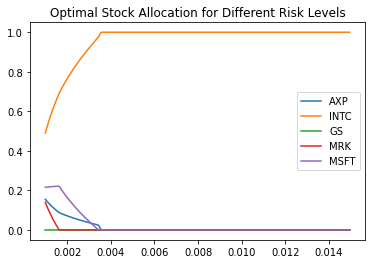

In [ ]:
#Parameter Analysis
# generating the dataframe for proportions of the portfolio for each risk limit
param_dw = pd.DataFrame.from_dict(param_dw, orient='index')
param_dw.columns = [ 'AXP', 'INTC', 'GS', 'MRK', 'MSFT']
param_dw.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

### Inferences from Stock Allocation Plot

From the plot allocation we can see that we would receive the best return on investment for the Intel stock from among the set of 5 stocks we have choosen.
Let us further evaluate the Efficient Frontier to validate the results we see in the Stock Allocation Plot


In [ ]:
# subset
risk = list(returnsdw.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returnsdw.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.00105, 0.0010999999999999998, 0.0011499999999999998, 0.0011999999999999997, 0.0012499999999999996, 0.0012999999999999995, 0.0013499999999999994, 0.0013999999999999993, 0.0014499999999999992, 0.0014999999999999992, 0.001549999999999999, 0.001599999999999999, 0.001649999999999999, 0.0016999999999999988, 0.0017499999999999987, 0.0017999999999999986, 0.0018499999999999986, 0.0018999999999999985, 0.0019499999999999984, 0.0019999999999999983, 0.002049999999999998, 0.002099999999999998, 0.0021499999999999983, 0.002199999999999998, 0.0022499999999999977, 0.002299999999999998, 0.002349999999999998, 0.0023999999999999976, 0.0024499999999999973, 0.0024999999999999974, 0.0025499999999999976, 0.0025999999999999973, 0.002649999999999997, 0.002699999999999997, 0.0027499999999999972, 0.002799999999999997, 0.0028499999999999966, 0.0028999999999999968, 0.002949999999999997, 0.0029999999999999966, 0.0030499999999999963, 0.0030999999999999964, 0.0031499999999999966, 0.0031999999999999963, 0.0032

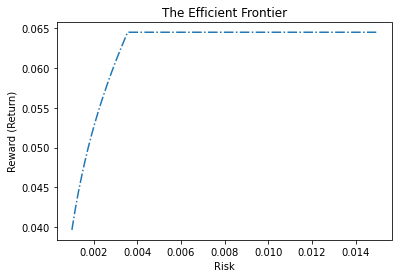

In [ ]:
# plot! pylab makes it easy
plot(risk, reward, '-.')
title('The Efficient Frontier') #adding title to the plot
xlabel('Risk') #Labelling X axis
ylabel('Reward (Return)') #Labelling Y axis
plt.show()

### Inferences from Efficient Frontier

We see that in the case of the Dow Jones Index by selecting the Intel Stock we can make a maximum return of ~6.5% (great returns) at a risk level of ~0.04. Post this risk level our returns do not increase even if we take on more risk.   
This validates what we have seen in the stock allocation plot and I would put all my money in the Nvidia stock to get the maximum returns.

# Conclusions

* 1. Overall we observed a common trend for all stocks in the senators portfolio, which is that the highest closing rates for most stocks was in December (Please refer to the plot below - Stock Trend)


* 2. We saw that during our stock allocation, that the senator most purchased and sold stocks most belong to three sectors that are Technology, Healthcare, and Financial Services.

* 3. We took our stock allocation by the senator against the pricing in the stock market during the same time period, we noticed that we though, the senator purchased/sold the most stocks in the earlier part of the year, it would be more beneficial to him, to sale their stock in the later half of the year, especially in December. Here is an visualization to demonstrate.

* 4. Our Stock Allocation is VGR, which was sold in May, the senator could increase his profit by selling in December as According to the trend, December has the highest selliing. 

* 5. In the first quarter of the year we see that the closing prices are low for most stocks in the senators portfolio except for the Vector Group Stock. 

* 6. While comparing the Efficient Frontiers for both the S&P 500 and Dow Jones indices, we see that we can get similar return ~6.5% higher return by investing in the Nvidia and Intel Stocks, however we take on lower risk ~0.004 as compared to that with Nvidia of 0.01 in the case of S&P 500.

* 7. Based on the above inferences, we would recommend the senator to keep one of the established semmiconductor stocks as one of his top 10, to increase the maximum returns on his portfolio.

* 8. By analyzing the Stock Allocation Plot and Efficient Frontier plots for the top 10 stocks, we where able to find the max_risk - 0.0015 which is what we set while analyzing stocks in the S&P and Dow Jones Index.

* 9. For someone intersted in the stock market, we would recommend them to start investing in the Dow Jones indeces across Financial, Semiconductor, Healthcare and Technology as the risk level involved is much lower as compared to investing in the S&P indices.


Team Contribution :     

1. Jowin - Stock Allocation and Video Presentation

2. Deepak - Non-Linear Optimization and Video Presentation

3. Ayushi - Conclusion and EDA

4. Divya - Visualizations and Beautification

5. Nitish - Overall Coding and Stock Allocation Analysis

In [ ]:
%%html
<h1> Stock Trend</h1>
<div class='tableauPlaceholder' id='viz1636299327237' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;Stocks_16362992943150&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Stocks_16362992943150&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;Stocks_16362992943150&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1636299327237');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>